In [2]:
import numpy as np
import pandas as pd


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mutual_info_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


import seaborn as sns
from wordcloud import WordCloud

from transformers import BertTokenizer, BertModel
import torch
import umap
from sklearn.neighbors import KNeighborsClassifier

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from tqdm import tqdm
import warnings

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
data = pd.read_csv("Data-Files\\BX-Preprocessed.csv")

Since Ratings' data is discrete, it is better to use a classification model than a regression model

# 1. Load and segment data for models

In [4]:
## 1.1. Data for Decision Tree
X_DT = data.drop(columns=['Book-Rating'])
y_DT = data['Book-Rating']
X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(X_DT, y_DT, test_size=0.2, random_state=42)
## 1.2. Data for Random Forest (Optimized Ddecision Tree)
X_RF = data.drop(columns=['Book-Rating'])
y_RF = data['Book-Rating']
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, y_RF, test_size=0.2, random_state=42)
## 1.3. Data for KNN
X_KNN = data.drop(columns=['Book-Rating'])
y_KNN = data['Book-Rating']
X_KNN_train, X_KNN_test, y_KNN_train, y_KNN_test = train_test_split(X_KNN, y_KNN, test_size=0.2, random_state=42)
## 1.4. Data for GBM (Gradient Boosting Machine, a kind of simplified SVM Machine Learning Model)
X_GBM = data.drop(columns=['Book-Rating'])
y_GBM = data['Book-Rating']
X_GBM_train, X_GBM_test, y_GBM_train, y_GBM_test = train_test_split(X_GBM, y_GBM, test_size=0.2, random_state=42)

# 2. Train the Models

The reason why I quit using SVM (Support Vector Machine)

<img src="https://s2.loli.net/2024/05/04/McNgZTWmDVztnup.png" alt="image-20240505010057817" style="zoom:50%;" /> 

About the SVM if you are intereted

```bibtex
Boser, B. E., Guyon, I. M., & Vapnik, V. N. (1992, July). A training algorithm for optimal margin classifiers. In Proceedings of the fifth annual workshop on Computational learning theory (pp. 144-152).
```

## 2.1. Training 4 Classification Models

In [5]:
## 2.1. Training Decison Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_DT_train, y_DT_train)
dt_predictions = dt_classifier.predict(X_DT_test)
## 2.2. Training Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_RF_train, y_RF_train)
rf_predictions = rf_classifier.predict(X_RF_test)
## 2.3. Training KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_KNN_train, y_KNN_train)
knn_predictions = knn_classifier.predict(X_KNN_test)
## 2.4. Training GBN
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_GBM_train, y_GBM_train)
gbm_predictions = gbm_classifier.predict(X_GBM_test)

## 2.2. Training Result

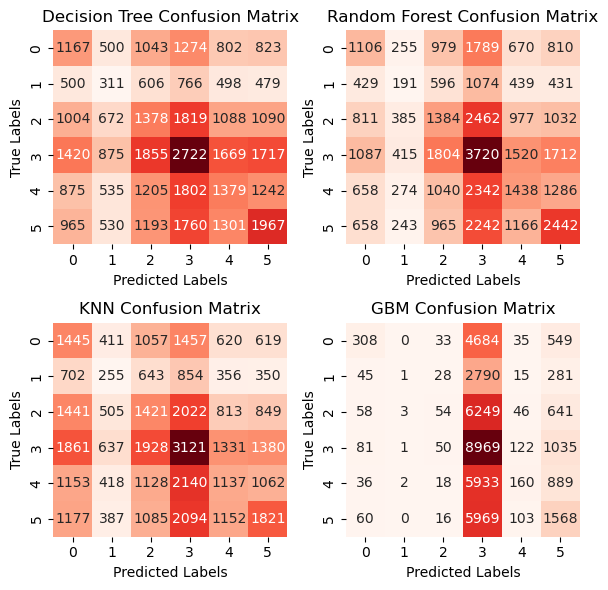

In [6]:
plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
sns.heatmap(confusion_matrix(y_DT_test, dt_predictions), annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.subplot(2, 2, 2)
sns.heatmap(confusion_matrix(y_RF_test, rf_predictions), annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.subplot(2, 2, 3)
sns.heatmap(confusion_matrix(y_KNN_test, knn_predictions), annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.subplot(2, 2, 4)
sns.heatmap(confusion_matrix(y_GBM_test, gbm_predictions), annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("GBM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

# 3. Performance Indicators

## 3.1. Calculate Indicators

In [7]:
## 3.1. Decision Tree Performance
accuracy_DT = accuracy_score(y_DT_test, dt_predictions)
f1_DT = f1_score(y_DT_test, dt_predictions, average='macro')
classification_rep_DT = classification_report(y_DT_test, dt_predictions)
## 3.2. Random Forest Performance
accuracy_RF = accuracy_score(y_RF_test, rf_predictions)
f1_RF = f1_score(y_RF_test, rf_predictions, average='macro')
classification_rep_RF = classification_report(y_RF_test, rf_predictions)
## 3.3. KNN Performance
accuracy_KNN = accuracy_score(y_KNN_test, knn_predictions)
f1_KNN = f1_score(y_KNN_test, knn_predictions, average='macro')
classification_rep_KNN = classification_report(y_KNN_test, knn_predictions)
## 3.4. GBN Performance
accuracy_GBM = accuracy_score(y_GBM_test, gbm_predictions)
f1_GBM = f1_score(y_GBM_test, gbm_predictions, average='macro')
classification_rep_GBM = classification_report(y_GBM_test, gbm_predictions)

## 3.2. Print all the Indicators

In [8]:
print('Decision Classifier Metrics:')
print(f'Accuracy: {accuracy_DT:.4f}')
print(f'F1-score: {f1_DT:.4f}')
print('Classification Report:')
print(classification_rep_DT)

print('Random Forest Classifier Metrics:')
print(f'Accuracy: {accuracy_RF:.4f}')
print(f'F1-score: {f1_RF:.4f}')
print('Classification Report:')
print(classification_rep_RF)

print('KNN Classifier Metrics:')
print(f'Accuracy: {accuracy_KNN:.4f}')
print(f'F1-score: {f1_KNN:.4f}')
print('Classification Report:')
print(classification_rep_KNN)

print('GBM Classifier Metrics:')
print(f'Accuracy: {accuracy_GBM:.4f}')
print(f'F1-score: {f1_GBM:.4f}')
print('Classification Report:')
print(classification_rep_GBM)

Decision Classifier Metrics:
Accuracy: 0.2186
F1-score: 0.2030
Classification Report:
              precision    recall  f1-score   support

           5       0.20      0.21      0.20      5609
           6       0.09      0.10      0.09      3160
           7       0.19      0.20      0.19      7051
           8       0.27      0.27      0.27     10258
           9       0.20      0.20      0.20      7038
          10       0.27      0.25      0.26      7716

    accuracy                           0.22     40832
   macro avg       0.20      0.20      0.20     40832
weighted avg       0.22      0.22      0.22     40832

Random Forest Classifier Metrics:
Accuracy: 0.2518
F1-score: 0.2228
Classification Report:
              precision    recall  f1-score   support

           5       0.23      0.20      0.21      5609
           6       0.11      0.06      0.08      3160
           7       0.20      0.20      0.20      7051
           8       0.27      0.36      0.31     10258
         

# 4. Feature Importance

## 4.1. Calculation of Importance

### 4.1.1. Importance for GBM/TD/RF

Using a built-in importance calculation method, feature importance is calculated by the model's own loss reduction method.

In [9]:
# Decision Tree
feature_importances_DT = dt_classifier.feature_importances_
feature_names_DT = X_DT.columns
sorted_idx_DT = feature_importances_DT.argsort()
# Random Forest
feature_importances_RF = rf_classifier.feature_importances_
feature_names_RF = X_RF.columns
sorted_idx_RF = feature_importances_RF.argsort()
# Gradient Boosting Machine
feature_importances_gbm = gbm_classifier.feature_importances_
feature_names_GBM = X_RF.columns
sorted_idx_gbm = feature_importances_gbm.argsort()

### 4.1.2. Importance for KNN

KNN is an instance-based learning method, which differs from models such as decision trees or random forests in that it does not compute the importance of features endogenously based on loss reduction during the training process

From this we adopt Permutation Feature Importance (a method applicable to any machine learning model) to illustrate the importance of parameters

In [10]:
original_accuracy_KNN = accuracy_score(y_KNN_test, knn_predictions)
importances_KNN = {}
for feature in X_KNN_train.columns:
    X_test_shuffled_KNN = X_KNN_test.copy()
    X_test_shuffled_KNN[feature] = np.random.permutation(X_test_shuffled_KNN[feature].values)
    shuffled_predictions_KNN = knn_classifier.predict(X_test_shuffled_KNN)
    shuffled_accuracy_KNN = accuracy_score(y_KNN_test, shuffled_predictions_KNN)
    importances_KNN[feature] = max(0, original_accuracy_KNN - shuffled_accuracy_KNN)
importances_sorted_KNN = sorted(importances_KNN.items(), key=lambda x: x[1], reverse=True)

## 4.2. Importance Result

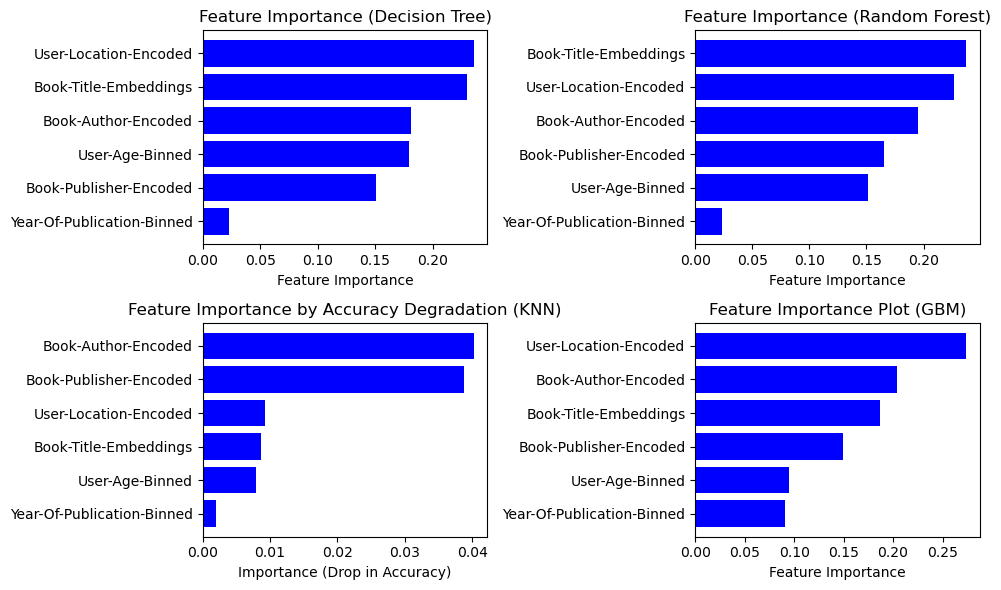

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes[0, 0].barh(range(len(sorted_idx_DT)), feature_importances_DT[sorted_idx_DT], align='center', color="blue")
axes[0, 0].set_yticks(range(len(sorted_idx_DT)))
axes[0, 0].set_yticklabels([feature_names_DT[i] for i in sorted_idx_DT])
axes[0, 0].set_xlabel('Feature Importance')
axes[0, 0].set_title('Feature Importance (Decision Tree)')
axes[0, 1].barh(range(len(sorted_idx_RF)), feature_importances_RF[sorted_idx_RF], align='center', color="blue")
axes[0, 1].set_yticks(range(len(sorted_idx_RF)))
axes[0, 1].set_yticklabels([feature_names_RF[i] for i in sorted_idx_RF])
axes[0, 1].set_xlabel('Feature Importance')
axes[0, 1].set_title('Feature Importance (Random Forest)')
axes[1, 0].barh([imp[0] for imp in importances_sorted_KNN][::-1], [imp[1] for imp in importances_sorted_KNN][::-1], color="blue")
axes[1, 0].set_xlabel('Importance (Drop in Accuracy)')
axes[1, 0].set_title('Feature Importance by Accuracy Degradation (KNN)')
axes[1, 1].barh(range(len(sorted_idx_gbm)), feature_importances_gbm[sorted_idx_gbm], align='center', color="blue")
axes[1, 1].set_yticks(range(len(sorted_idx_gbm)))
axes[1, 1].set_yticklabels([X_GBM.columns[i] for i in sorted_idx_gbm])
axes[1, 1].set_xlabel('Feature Importance')
axes[1, 1].set_title('Feature Importance Plot (GBM)')
plt.tight_layout()
plt.show()
